<a href="https://colab.research.google.com/github/anakhashibu1999/ML-projects/blob/main/Feature_selection_framingham_in_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [ ]:
df.drop(['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
X.columns

Index(['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP',
       'prevalentHyp', 'diabetes', 'BPMeds'],
      dtype='object')

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test=SelectKBest(score_func=chi2)
fi=test.fit(X,y)
fi.scores_

array([ 18.89992969, 319.26601922,   0.81133358, 231.66955767,
        30.75959508,  16.10988745,  92.04873629,  39.14494372,
       235.50239174, 727.93553524, 152.7485629 ,  15.22736737,
         4.23237233, 391.15110532])

In [ ]:
col=X.columns
score=pd.DataFrame({'features':col,'score_chi2':fi.scores_})
score

,features,score_chi2
0,male,18.899930
1,age,319.266019
2,currentSmoker,0.811334
3,cigsPerDay,231.669558
4,BPMeds,30.759595
5,prevalentStroke,16.109887
6,prevalentHyp,92.048736
7,diabetes,39.144944
8,totChol,235.502392
9,sysBP,727.935535


In [ ]:
score.sort_values(by='score_chi2',ascending=False)

,features,score_chi2
9,sysBP,727.935535
13,glucose,391.151105
1,age,319.266019
8,totChol,235.502392
3,cigsPerDay,231.669558
10,diaBP,152.748563
6,prevalentHyp,92.048736
7,diabetes,39.144944
4,BPMeds,30.759595
0,male,18.899930


In [ ]:
X=df[['sysBP','glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds']]

In [ ]:
X

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds
0,106.0,77.000000,39,195.0,0.0,70.0,0,0,0.0
1,121.0,76.000000,46,250.0,0.0,81.0,0,0,0.0
2,127.5,70.000000,48,245.0,20.0,80.0,0,0,0.0
3,150.0,103.000000,61,225.0,30.0,95.0,1,0,0.0
4,130.0,85.000000,46,285.0,23.0,84.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
4235,131.0,86.000000,48,248.0,20.0,72.0,0,0,0.0
4236,126.5,81.963655,44,210.0,15.0,87.0,0,0,0.0
4237,133.5,107.000000,52,269.0,0.0,83.0,0,0,0.0
4238,141.0,72.000000,40,185.0,0.0,98.0,1,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[0.18068536, 0.11299435, 0.44736842, ..., 0.        , 0.        ,
        0.        ],
       [0.35825545, 0.07062147, 0.36842105, ..., 1.        , 0.        ,
        0.        ],
       [0.21495327, 0.0960452 , 0.36842105, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.40186916, 0.1185414 , 0.15789474, ..., 1.        , 0.        ,
        0.        ],
       [0.25856698, 0.07627119, 0.60526316, ..., 0.        , 0.        ,
        0.        ],
       [0.15264798, 0.09887006, 0.10526316, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test_new=sc.transform(X_test)
X_test_new

array([[0.38317757, 0.08474576, 0.10526316, ..., 1.        , 0.        ,
        0.        ],
       [0.22741433, 0.11016949, 0.18421053, ..., 0.        , 0.        ,
        0.        ],
       [0.52336449, 0.10451977, 0.31578947, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14641745, 0.11299435, 0.44736842, ..., 0.        , 0.        ,
        0.        ],
       [0.3894081 , 0.12711864, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.33956386, 0.1920904 , 0.15789474, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1085
           1       0.22      0.06      0.09       187

    accuracy                           0.83      1272
   macro avg       0.54      0.51      0.50      1272
weighted avg       0.76      0.83      0.79      1272



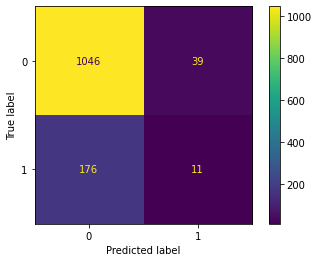

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))